In [2]:
fichier = open('The-Lord-of-the-Rings.txt', 'r', encoding='utf-8')

# Lire les 24000 premières lignes du fichier
nombre_lignes_voulues = 24000
texte = ""
for i in range(nombre_lignes_voulues):
    ligne = fichier.readline()
    if not ligne:
        break
    texte += ligne

# Fermer le fichier après avoir lu les lignes nécessaires
fichier.close()


In [3]:
from gensim.utils import simple_preprocess
import nltk
from gensim.models import Word2Vec

nltk.download('punkt')
# Découpez le texte en phrases
sentences = nltk.sent_tokenize(texte)

corpus = [simple_preprocess(sentence) for sentence in sentences]



# Création du modèle Word2Vec
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, sg=0)

model.build_vocab(corpus, progress_per=1000000)

words = list(model.wv.index_to_key)
print('Vocabulary size: %d' % len(words))
print(words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\récup\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vocabulary size: 13413
['the', 'and', 'of', 'to', 'he', 'in', 'it', 'that', 'was', 'you', 'they', 'but', 'his', 'said', 'not', 'for', 'as', 'is', 'with', 'at', 'on', 'had', 'there', 'we', 'have', 'were', 'all', 'him', 'be', 'them', 'from', 'now', 'frodo', 'if', 'their', 'no', 'or', 'then', 'will', 'are', 'up', 'out', 'by', 'this', 'so', 'what', 'my', 'came', 'great', 'do', 'sam', 'me', 'long', 'could', 'come', 'into', 'would', 'down', 'more', 'your', 'like', 'when', 'gandalf', 'one', 'again', 'before', 'some', 'go', 'been', 'back', 'away', 'many', 'still', 'us', 'men', 'upon', 'about', 'see', 'than', 'last', 'far', 'can', 'here', 'did', 'yet', 'over', 'dark', 'only', 'an', 'has', 'aragorn', 'time', 'old', 'way', 'went', 'well', 'even', 'any', 'must', 'seemed', 'its', 'shall', 'may', 'where', 'pippin', 'know', 'our', 'looked', 'eyes', 'little', 'light', 'very', 'who', 'which', 'merry', 'while', 'after', 'hobbits', 'road', 'through', 'saw', 'thought', 'say', 'other', 'night', 'ring', 'he

In [4]:

# Entraînement du modèle
model.train(corpus, total_examples=len(corpus), epochs=10)



(3627610, 4912710)

In [5]:
print('Similarity between \'frodo\' and \'sam\': ', model.wv.similarity("frodo", "sam"))

Similarity between 'frodo' and 'sam':  0.8174579


In [6]:
model.wv.most_similar(positive=["frodo"])

[('pippin', 0.8582959175109863),
 ('gollum', 0.8261444568634033),
 ('sam', 0.817457914352417),
 ('merry', 0.7614044547080994),
 ('butterbur', 0.7554401159286499),
 ('strider', 0.737047016620636),
 ('bilbo', 0.7153019309043884),
 ('he', 0.7081654071807861),
 ('gandalf', 0.692085862159729),
 ('baggins', 0.6862940788269043)]

In [7]:
from sklearn.manifold import TSNE
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [24]:
from collections import Counter
import spacy

nlp = spacy.load("en_core_web_sm")
nlp.max_length = 3100000
doc = nlp(texte)

personnages_lotr = []
# Parcourir les entités nommées dans le texte
for ent in doc.ents:
    if ent.label_ == "PERSON":  # Filtrer les entités de type "PERSON"
        personnages_lotr.append(ent.text)
# Compter les occurrences des noms de personnages
compteur_noms = Counter(personnages_lotr)

# Filtrer les noms répétés au moins 10 fois
noms_recurrents = [nom for nom, occurences in compteur_noms.items() if occurences >= 10]
personnages_lotr = noms_recurrents

liste_a_supprimer = ["Tolkien",'Bilbo Baggins', "Dúnedain", "Enemy","Sting","Moon","Underhill","Mark","Greyflood","Halfling","Andúril","Barad-dûr","Lady","Mithrandir","Dike","Morgai",""]  

for nom in liste_a_supprimer:
    if nom in personnages_lotr:
        personnages_lotr.remove(nom)
lieu_lotr=[]
noms_a_deplacer = ["Moria", "Mordor", "Anórien", "Bree", "Brandywine","Shire","Anduin","Dale","Rivendell","Mordor","Downs","Elrond","Lórien","Gorgoroth","Minas Tirith","Havens","Dol Guldur","Orthanc","Edoras","Isen","Tol Brandir","Fangorn","Amon Hen","Helm","Westfold","Pelennor","Dol Amroth",""]

# Déplacer les noms de personnages vers lieu_lotr
for nom in noms_a_deplacer:
    if nom in personnages_lotr:
        personnages_lotr.remove(nom)
        lieu_lotr.append(nom)


In [25]:
print(personnages_lotr)

['Strider', 'Merry', 'Gimli', 'Durin', 'Bilbo', 'Gollum', 'Baggins', 'Galadriel', 'Bilbo Baggins', 'Frodo', 'Sam Gamgee', 'Gaffer', 'Brandybuck', 'Sam', 'Pippin', 'Ted', 'Gil-galad', 'Sméagol', 'Gildor', 'Maggot', 'Tom', 'Tom Bombadil', 'Goldberry', 'Butterbur', 'Barliman', 'Bill Ferny', 'Ranger', 'Bill', 'Tinúviel', 'Beren', 'Glorfindel', 'Arwen', 'Elrohir', 'Legolas', 'Boromir', 'Saruman', 'Nazgûl', 'Aragorn', 'Gwaihir', 'Aragorn.', 'Eorl', 'Éomer', 'Thengel', 'Uglúk', 'Grishnákh', 'Treebeard', 'Bregalad', 'Théoden', 'Wormtongue', 'Gríma', 'Éowyn', 'Snowmane', 'Faramir', 'Samwise', 'Shelob', 'Shagrat', 'Denethor', 'Beregond', 'Bergil', 'Dernhelm', 'Imrahil', 'Rosie', 'Sharkey', 'Cotton', 'Farmer Cotton']


In [26]:
import re

def preprocess_name(name):
    # Convertir en minuscules
    name = name.lower()
    # Supprimer les espaces en début et fin de nom
    name = name.strip()
    # Supprimer les caractères spéciaux et la ponctuation
    name = re.sub(r'[^\w\s]', '', name)
    return name

# Appliquer le prétraitement à chaque nom dans la liste
personnages_lotr = [preprocess_name(name) for name in personnages_lotr]


In [38]:
liste_a_supprimer = ['bilbo baggins', 'sam gamgee','gilgalad', 'tom bombadil', 'bill ferny','farmer cotton']  

for nom in liste_a_supprimer:
    if nom in personnages_lotr:
        personnages_lotr.remove(nom)
print(personnages_lotr)

['strider', 'merry', 'gimli', 'durin', 'bilbo', 'gollum', 'baggins', 'galadriel', 'frodo', 'gaffer', 'brandybuck', 'sam', 'pippin', 'ted', 'sméagol', 'gildor', 'maggot', 'tom', 'goldberry', 'butterbur', 'barliman', 'ranger', 'bill', 'tinúviel', 'beren', 'glorfindel', 'arwen', 'elrohir', 'legolas', 'boromir', 'saruman', 'nazgûl', 'aragorn', 'gwaihir', 'aragorn', 'eorl', 'éomer', 'thengel', 'uglúk', 'grishnákh', 'treebeard', 'bregalad', 'théoden', 'wormtongue', 'gríma', 'éowyn', 'snowmane', 'faramir', 'samwise', 'shelob', 'shagrat', 'denethor', 'beregond', 'bergil', 'dernhelm', 'imrahil', 'rosie', 'sharkey', 'cotton']


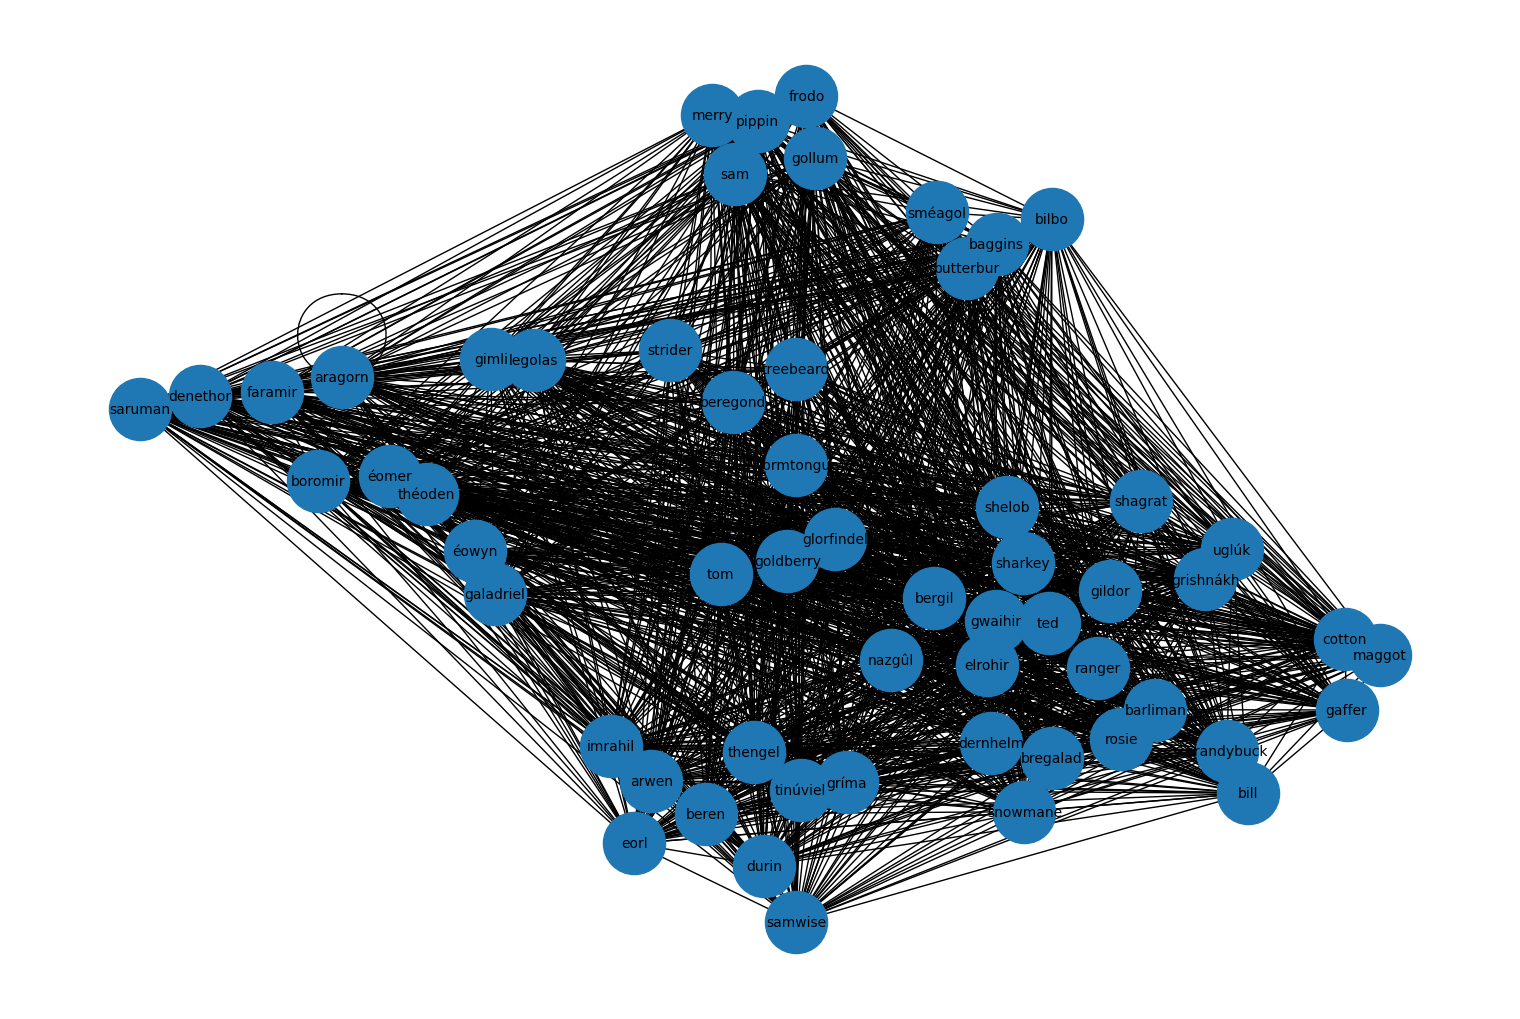

In [48]:
# Noms de personnages pour lesquels vous voulez créer des nœuds dans le graphe
# personnages = ["frodo", "gandalf", "sam", "aragorn", "gimli","legolas", "saruman", "orcs", "boromir", "pippin","théoden", "faramir","sméagol","gollum","sauron"]

# Créer un dictionnaire de vecteurs de mots pour les personnages
vectors = {personnage: model.wv[personnage] for personnage in personnages_lotr}

# Convertir les vecteurs en une numpy array
vector_array = np.array([vectors[personnage] for personnage in personnages_lotr])

# Réduction de dimension avec t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
vectors_2d = tsne.fit_transform(vector_array)

# Créer le graphe avec NetworkX
G = nx.Graph()

# Ajouter les nœuds (personnages) au graphe
for i, personnage in enumerate(personnages_lotr):
    G.add_node(personnage, pos=vectors_2d[i])

# Calculer et ajouter les arêtes (liens) basées sur la similarité des vecteurs
for i, personnage1 in enumerate(personnages_lotr):
    for j, personnage2 in enumerate(personnages_lotr):
        if i < j:
            similarity = np.dot(vectors[personnage1], vectors[personnage2])
            G.add_edge(personnage1, personnage2, weight=similarity)

# Dessiner le graphe
plt.figure(figsize=(15, 10))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10,arrows=False)
#edge_labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

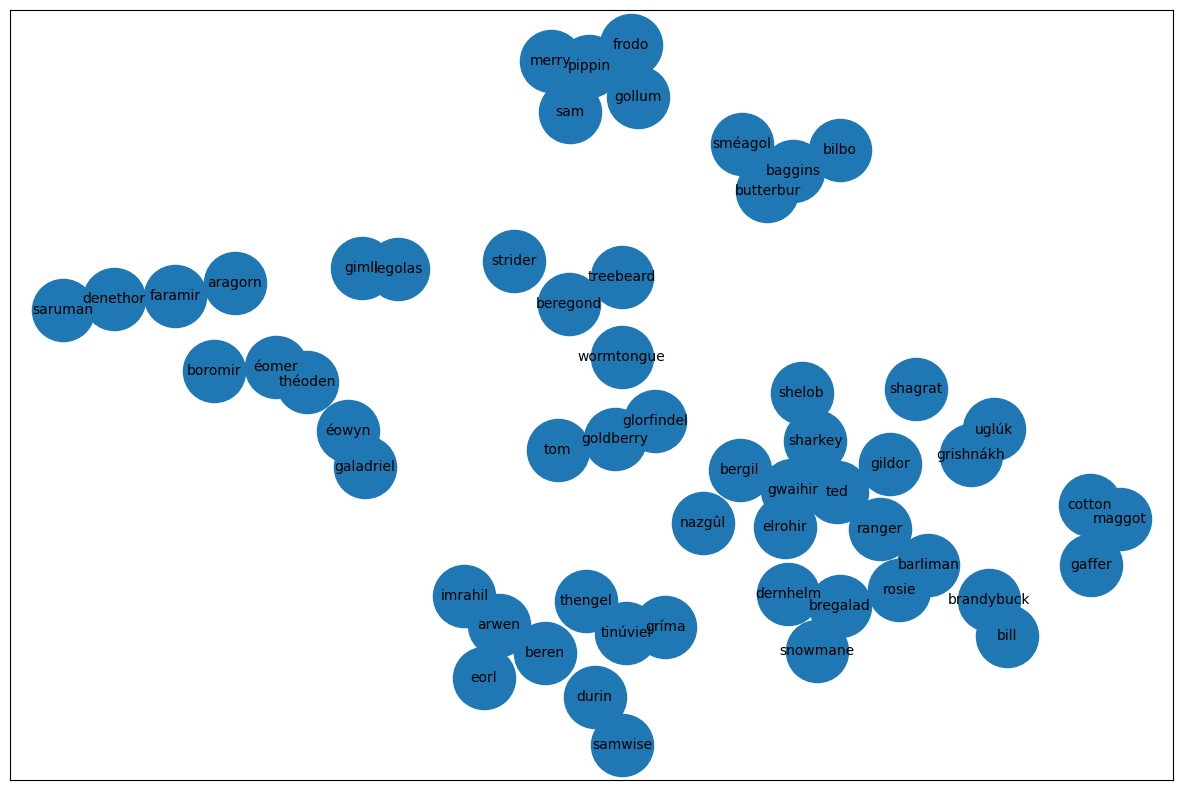

In [50]:
plt.figure(figsize=(15, 10))  # Ajustez les dimensions selon vos préférences

# Dessiner uniquement les nœuds sans les arêtes
nx.draw_networkx_nodes(G, pos, node_size=2000)
nx.draw_networkx_labels(G, pos, font_size=10)

# Afficher la figure agrandie
plt.show()